In [ ]:
from os import path
import pandas as pd
from tqdm.notebook import tqdm
import torch
import matplotlib.pyplot as plt

base = "/content/drive/MyDrive/NLP100/ch08"

fp_train = "70/train.csv"
fp_valid = "70/valid.csv"
df_train = pd.read_csv(path.join(base, fp_train), index_col=0)
df_valid = pd.read_csv(path.join(base, fp_valid), index_col=0)
df_train.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
311098,RPT-Fitch Updates EMEA Consumer ABS Rating Cri...,http://in.reuters.com/article/2014/06/24/fitch...,Reuters,0,d3tIMfB2mg-9MZM4G_jGTEiRVl3jM,in.reuters.com,1403633888597,-0.001314,0.037862,-0.026672,0.023646,-0.081309,0.057292,0.020793,-0.004089,0.082174,-0.002248,-0.022980,0.068644,0.098045,-0.021500,-0.184367,-0.066833,0.187785,0.045003,-0.075684,0.020335,0.080343,0.133657,-0.060649,0.177368,0.058131,0.041290,-0.068349,0.165202,0.094462,0.060148,-0.175133,-0.007964,-0.023811,...,0.129374,-0.045410,-0.030120,-0.029256,0.085144,0.040588,-0.081685,-0.098497,0.092773,-0.120480,-0.068659,0.059037,-0.118296,-0.065590,-0.036647,0.029958,0.034060,0.033641,0.071494,0.032679,-0.137390,0.013021,0.029460,-0.039007,-0.014064,0.028880,-0.003194,0.052385,-0.021932,0.113113,0.085225,0.070714,-0.038605,0.124247,0.043162,-0.029622,0.018305,0.085449,0.041219,-0.043620
49198,"Gurlitt Wants to Return Nazi-Looted Art, Suedd...",http://www.businessweek.com/news/2014-03-26/gu...,Businessweek,2,dWeC4g3bvX-bI6MKAcxt43Jp7MzSM,www.businessweek.com,1395886231417,0.119507,0.048203,-0.051575,-0.014130,0.052837,0.131592,0.029251,-0.041846,0.007202,0.044903,-0.120361,0.073059,-0.026611,0.071785,-0.028809,-0.058235,-0.035706,0.040100,-0.049072,0.029297,0.088989,0.110657,0.072845,0.093506,-0.072479,0.039246,-0.003685,0.005188,-0.049683,0.103149,0.052261,-0.071106,-0.093994,...,0.071457,0.065735,0.001794,0.118408,0.084869,0.080444,-0.080811,-0.006203,0.047668,0.095886,0.075562,0.032227,0.133545,0.013916,0.089539,0.061638,-0.037537,-0.036049,0.010513,-0.037415,-0.046600,0.061676,-0.122375,0.077362,0.090454,0.049744,-0.016205,0.113892,0.044678,0.026615,-0.096585,-0.046362,-0.111450,0.115601,0.027069,0.017731,-0.066109,-0.092987,0.049255,-0.078003
410578,"UPDATE 1-Fairfax Financial, CEO probed over po...",http://in.reuters.com/article/2014/08/01/fairf...,Reuters,0,d6s61cXf9rASExMO8inpkRujc9VTM,in.reuters.com,1406929609070,-0.027208,0.007894,-0.018816,-0.117791,-0.013855,0.014296,0.008413,0.019104,0.171115,0.043545,-0.152289,0.039632,0.042263,-0.009230,-0.092692,-0.008898,-0.015686,0.031908,0.006592,-0.047694,-0.029080,-0.003977,0.071289,-0.047387,0.060900,-0.035598,-0.081624,0.043403,-0.034064,0.048928,0.028076,0.047011,-0.118218,...,0.035502,0.011210,0.037638,-0.024943,0.013970,0.076586,-0.117757,0.025011,-0.058146,0.016303,-0.011529,0.053528,0.036892,-0.090074,-0.054633,-0.021145,-0.057997,-0.005412,0.050978,0.136827,-0.101793,0.112632,-0.084054,0.044612,0.154107,0.002821,-0.094137,0.091295,0.033488,0.004069,-0.004666,-0.019070,-0.127279,0.066745,-0.100342,-0.027534,-0.004937,0.060760,0.024204,-0.030084
270668,Angelina Jolie - Angelina Jolie Will Not Tight...,http://www.contactmusic.com/story/angelina-jol...,Contactmusic.com,2,d7SbUKanRaD34YMwE64lo09d_qCnM,www.contactmusic.com,1401828902205,0.041495,0.023817,-0.139968,0.066092,-0.128230,0.041222,-0.031513,-0.062556,0.033259,0.084491,0.055627,-0.051058,-0.008244,0.054617,-0.093083,0.002742,-0.010099,0.032428,-0.126578,-0.036814,0.010050,0.040527,0.195050,0.106788,-0.025531,-0.112279,0.036545,0.065195,0.045805,-0.118972,-0.081160,-0.038743,-0.142465,...,-0.003488,0.148945,0.032250,0.036339,0.088435,0.147010,-0.264986,0.080181,-0.051074,-0.023569,0.065317,0.029278,0.004169,0.111516,0.115882,-0.045206,0.177396,-0.017759,-0.059991,-0.054676,0.000347,-0.111197,-0.069393,0.131484,0.029644,0.067834,-0.131770,-0.111361,0.016447,0.056566,-0.142315,0.059533,-0.078726,0.063308,-0.031076,-0.083947,-0.062951,-0.072796,-0.045157,0.098994
301656,Patent Officials Cancel the Washington Redskin...,http://www.businessweek.com/articles/2014-

In [ ]:
X_train = torch.tensor(df_train[[str(r) for r in range(300)]].values.astype("float32"))
y_train = torch.tensor(df_train["CATEGORY"].values.astype("int"))
X_valid = torch.tensor(df_valid[[str(r) for r in range(300)]].values.astype("float32"))
y_valid = torch.tensor(df_valid["CATEGORY"].values.astype("int"))
print(X_train[:5])
print(y_train[:5])

tensor([[-0.0013,  0.0379, -0.0267,  ...,  0.0854,  0.0412, -0.0436],
        [ 0.1195,  0.0482, -0.0516,  ..., -0.0930,  0.0493, -0.0780],
        [-0.0272,  0.0079, -0.0188,  ...,  0.0608,  0.0242, -0.0301],
        [ 0.0415,  0.0238, -0.1400,  ..., -0.0728, -0.0452,  0.0990],
        [ 0.0851,  0.0319,  0.1310,  ..., -0.0540,  0.0016,  0.0300]])
tensor([0, 2, 0, 2, 0])


In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(300, 4),
    torch.nn.Softmax(dim=1)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

loss_trains = []
accuracy_trains = []
loss_valids = []
accuracy_valids = []

for epoch in tqdm(range(1, 2001)):
  optimizer.zero_grad()
  loss_train = loss_fn(model(X_train), y_train)
  loss_train.backward()
  optimizer.step()

  loss_valid = loss_fn(model(X_valid), y_valid)
  with torch.no_grad():
    total_train = len(y_train)
    correct_train = (torch.argmax(model(X_train), dim=1) == y_train).sum().item()
    accuracy_train = correct_train / total_train
  with torch.no_grad():
    total_valid = len(y_valid)
    correct_valid = (torch.argmax(model(X_valid), dim=1) == y_valid).sum().item()
    accuracy_valid = correct_valid / total_valid
  loss_trains.append(loss_train.item())
  accuracy_trains.append(accuracy_train)
  loss_valids.append(loss_valid.item())
  accuracy_valids.append(accuracy_valid)
  if epoch % 100 == 0:
    print(f"epoch: {epoch}, loss train: {loss_train.item()}, loss valid: {loss_valid.item()}")

epoch: 100, loss train: 1.2973434925079346, loss valid: 1.2946066856384277
epoch: 200, loss train: 1.2311792373657227, loss valid: 1.2262961864471436
epoch: 300, loss train: 1.1834930181503296, loss valid: 1.1769025325775146
epoch: 400, loss train: 1.1483184099197388, loss valid: 1.1405411958694458
epoch: 500, loss train: 1.1221998929977417, loss valid: 1.1136119365692139
epoch: 600, loss train: 1.102413535118103, loss valid: 1.0932708978652954
epoch: 700, loss train: 1.0870568752288818, loss valid: 1.0775290727615356
epoch: 800, loss train: 1.07485032081604, loss valid: 1.0650522708892822
epoch: 900, loss train: 1.0649418830871582, loss valid: 1.0549434423446655
epoch: 1000, loss train: 1.0567351579666138, loss valid: 1.0465960502624512
epoch: 1100, loss train: 1.0498379468917847, loss valid: 1.039589524269104
epoch: 1200, loss train: 1.043950080871582, loss valid: 1.0336216688156128
epoch: 1300, loss train: 1.0388615131378174, loss valid: 1.028475284576416
epoch: 1400, loss train: 1.

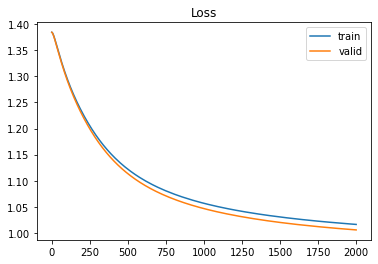

In [ ]:
plt.plot(loss_trains, label="train")
plt.plot(loss_valids, label="valid")
plt.title("Loss")
plt.legend()
plt.show()

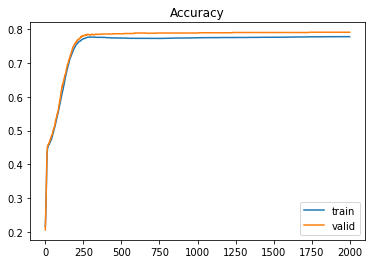

In [ ]:
plt.plot(accuracy_trains, label="train")
plt.plot(accuracy_valids, label="valid")
plt.title("Accuracy")
plt.legend()
plt.show()